In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import rasterio.features as features
from rasterio.plot import show
import geopandas as gpd

<AxesSubplot:>

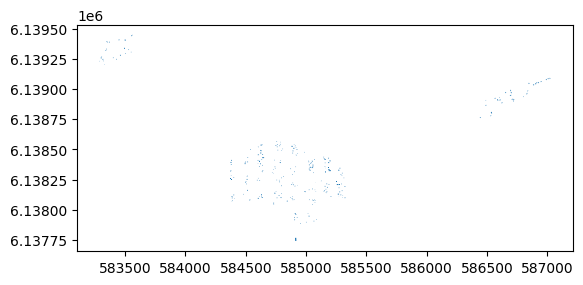

In [2]:
# Read in vector
vector = gpd.read_file("input_vector_data/labels.geojson")

# Get list of geometries for all features in vector file
geom = [shapes for shapes in vector.geometry]

vector.plot()

In [3]:
input_tif = 'images/tif/J-29-C-5-M-9.tif'

raster = rasterio.open(input_tif)

RasterioIOError: images/tif/J-29-C-5-M-9.tif: No such file or directory

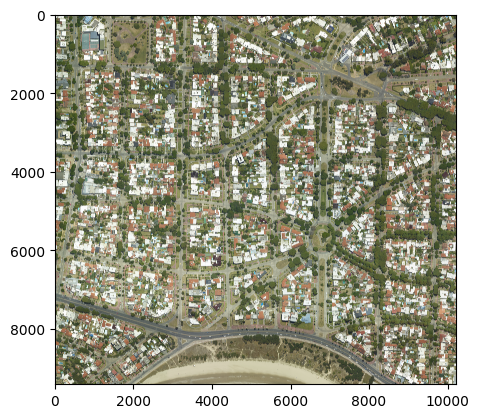

In [4]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(raster.read(1))
greenn = normalize(raster.read(2))
bluen = normalize(raster.read(3))

rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb)

In [5]:
metadata = raster.meta.copy()
metadata

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 10223,
 'height': 9411,
 'count': 3,
 'crs': CRS.from_epsg(32721),
 'transform': Affine(0.1, 0.0, 584006.8766699999,
        0.0, -0.1, 6138819.79242)}

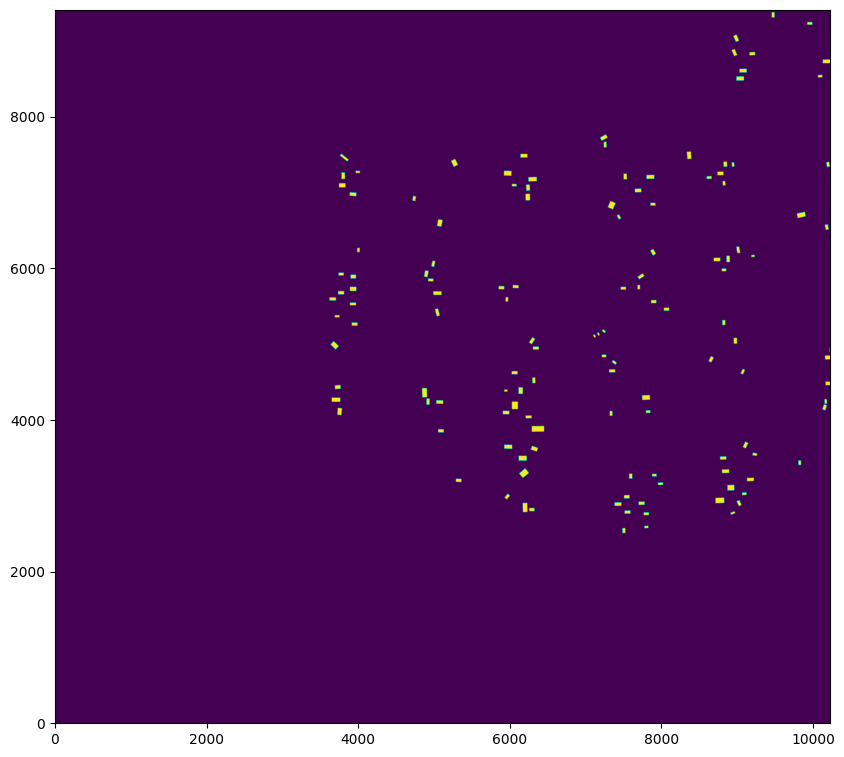

In [6]:
# Rasterize vector using the shape and coordinate system of the raster
rasterized = features.rasterize(
    geom,
    out_shape = raster.shape,
    fill = 0,
    out = None,
    transform = raster.transform,
    all_touched = False,
    default_value = 1,
    dtype = None)

# Plot raster
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized, ax = ax)
plt.gca().invert_yaxis()

In [7]:
vector = gpd.read_file("input_vector_data/labels.geojson")
geom = [shapes for shapes in vector.geometry]

def generate_mask(input_image, labels, output_image):
    raster = rasterio.open(input_image)
    metadata = raster.meta.copy()

    rasterized = features.rasterize(
        geom,
        out_shape = raster.shape,
        fill = 0,
        out = None,
        transform = raster.transform,
        all_touched = False,
        default_value = 255,
        dtype = None)
    
    if np.sum(rasterized)==0:
        print(f'No intersection between {input_image} and vector')

    new_dataset = rasterio.open(
        output_image,
        'w',
        driver='GTiff',
        height=rasterized.shape[0],
        width=rasterized.shape[1],
        nodata=0,
        count=1,
        dtype=str(rasterized.dtype),
        crs=metadata['crs'],
        transform=metadata['transform'])

    new_dataset.write(rasterized, 1)
    new_dataset.close()
    print(f'Saved image to {output_image}')

In [8]:
input_images = [f'images/tif/tiles/{img}' for img in os.listdir('images/tif/tiles') if img.endswith('.tif')]
print(f'Input images list is {len(input_images)} length.')
output_images = [f'images/tif/masks/{os.path.basename(img)}' for img in input_images]

Input images list is 2974 length.


In [9]:
if not os.path.isdir('images/tif/masks'):
    os.makedirs('images/tif/masks')
    print('Directory was created')
else:
    print('Directory already exists')

Directory already exists


In [10]:
for input_img, output_img in zip(input_images, output_images):
    generate_mask(input_img, geom, output_img)

Saved image to images/tif/masks/J-29-C-5-N-6_15.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_51.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_51.tif
Saved image to images/tif/masks/J-29-C-5-M-9_75.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_48.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_48.tif
Saved image to images/tif/masks/J-29-C-5-N-7_36.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_12.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_12.tif
Saved image to images/tif/masks/J-29-C-5-N-8_60.tif
Saved image to images/tif/masks/J-29-C-5-P-1_10.tif
Saved image to images/tif/masks/J-29-C-5-N-7_8.tif
Saved image to images/tif/masks/J-29-C-5-M-9_65.tif
Saved image to images/tif/masks/J-29-C-5-M-9_64.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_69.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_69.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_42.tif and vector
Saved image to im

No intersection between images/tif/tiles/J-29-C-5-N-7_76.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-7_76.tif
No intersection between images/tif/tiles/J-29-C-3-O-7_85.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_85.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_20.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_20.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_69.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_69.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_48.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_48.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_49.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_49.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_56.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_56.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_18.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_18.tif
No inter

No intersection between images/tif/tiles/J-29-C-2-P-8_43.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_43.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_54.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_54.tif
No intersection between images/tif/tiles/J-29-C-5-M-3_19.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-3_19.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_96.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_96.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_83.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_83.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_93.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_93.tif
No intersection between images/tif/tiles/J-29-C-5-M-3_61.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-3_61.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_63.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_63.tif
Saved im

No intersection between images/tif/tiles/J-29-C-5-M-6_85.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-6_85.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_65.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_65.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_42.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_42.tif
Saved image to images/tif/masks/J-29-C-5-N-7_23.tif
No intersection between images/tif/tiles/J-29-C-5-O-2_69.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-2_69.tif
No intersection between images/tif/tiles/J-29-C-6-M-4_72.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-4_72.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_88.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_88.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_68.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_68.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_84.tif and vector
Saved im

No intersection between images/tif/tiles/J-29-C-2-P-8_73.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_73.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_53.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_53.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_9.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_9.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_92.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_92.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_49.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_49.tif
No intersection between images/tif/tiles/J-29-C-5-M-6_84.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-6_84.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_29.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_29.tif
No intersection between images/tif/tiles/J-29-C-6-M-4_39.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-4_39.tif
No interse

Saved image to images/tif/masks/J-29-C-4-P-3_32.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_51.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_51.tif
No intersection between images/tif/tiles/J-29-C-3-O-7_83.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_83.tif
No intersection between images/tif/tiles/J-29-C-2-P-5_53.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_53.tif
No intersection between images/tif/tiles/J-29-C-5-M-2_39.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-2_39.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_69.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_69.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_75.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_75.tif
No intersection between images/tif/tiles/J-29-C-5-N-6_40.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-6_40.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_68.tif and vector
Saved im

No intersection between images/tif/tiles/J-29-C-5-O-3_39.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_39.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_18.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_18.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_8.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_8.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_29.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_29.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_86.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_86.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_15.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_15.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_40.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_40.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_6.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_6.tif
Saved image 

No intersection between images/tif/tiles/J-29-C-2-P-4_20.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_20.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_82.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_82.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_78.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_78.tif
No intersection between images/tif/tiles/J-29-C-5-N-6_67.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-6_67.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_90.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_90.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_71.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_71.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_1.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_1.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_11.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_11.tif
No interse

No intersection between images/tif/tiles/J-29-C-2-P-7_14.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_14.tif
No intersection between images/tif/tiles/J-29-C-5-N-6_61.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-6_61.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_10.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_10.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_29.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_29.tif
No intersection between images/tif/tiles/J-29-C-5-M-3_88.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-3_88.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_22.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_22.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_81.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_81.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_73.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_73.tif
No inter

Saved image to images/tif/masks/J-29-C-5-M-5_32.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_90.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_90.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_66.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_66.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_12.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_12.tif
No intersection between images/tif/tiles/J-29-C-6-M-1_53.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-1_53.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_64.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_64.tif
No intersection between images/tif/tiles/J-29-C-2-P-5_57.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_57.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_60.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_60.tif
No intersection between images/tif/tiles/J-29-C-6-M-1_77.tif and vector
Saved im

No intersection between images/tif/tiles/J-29-C-3-O-7_86.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_86.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_25.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_25.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_21.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_21.tif
No intersection between images/tif/tiles/J-29-C-5-N-6_20.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-6_20.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_0.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_0.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_44.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_44.tif
No intersection between images/tif/tiles/J-29-C-3-O-7_99.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_99.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_70.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_70.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-N-2_69.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_69.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_35.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_35.tif
Saved image to images/tif/masks/J-29-C-5-M-9_94.tif
No intersection between images/tif/tiles/J-29-C-5-M-6_94.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-6_94.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_39.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_39.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_71.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_71.tif
No intersection between images/tif/tiles/J-29-C-2-P-5_71.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_71.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_18.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_18.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_22.tif and vector
Saved im

No intersection between images/tif/tiles/J-29-C-5-M-8_28.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_28.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_38.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_38.tif
Saved image to images/tif/masks/J-29-C-5-N-5_68.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_89.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_89.tif
Saved image to images/tif/masks/J-29-C-5-N-5_95.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_62.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_62.tif
No intersection between images/tif/tiles/J-29-C-5-M-2_78.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-2_78.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_87.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_87.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_35.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_35.tif
No intersection between imag

No intersection between images/tif/tiles/J-29-C-5-N-3_51.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_51.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_54.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_54.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_52.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_52.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_23.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_23.tif
No intersection between images/tif/tiles/J-29-C-3-O-7_90.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_90.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_41.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_41.tif
Saved image to images/tif/masks/J-29-C-5-N-7_16.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_74.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_74.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_89.tif and vector
Saved im

No intersection between images/tif/tiles/J-29-C-5-M-4_16.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_16.tif
No intersection between images/tif/tiles/J-29-C-5-M-3_85.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-3_85.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_17.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_17.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_32.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_32.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_88.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_88.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_65.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_65.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_27.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_27.tif
No intersection between images/tif/tiles/J-29-C-5-N-7_63.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-7_63.tif
No inter

No intersection between images/tif/tiles/J-29-C-5-O-1_75.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_75.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_53.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_53.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_35.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_35.tif
No intersection between images/tif/tiles/J-29-C-5-N-6_13.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-6_13.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_18.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_18.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_39.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_39.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_97.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_97.tif
Saved image to images/tif/masks/J-29-C-5-M-9_93.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_17.tif and vector
Saved im

No intersection between images/tif/tiles/J-29-C-4-P-3_73.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_73.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_62.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_62.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_76.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_76.tif
No intersection between images/tif/tiles/J-29-C-5-N-7_88.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-7_88.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_11.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_11.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_59.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_59.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_83.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_83.tif
No intersection between images/tif/tiles/J-29-C-6-M-4_16.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-4_16.tif
No inter

Saved image to images/tif/masks/J-29-C-5-N-7_24.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_33.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_33.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_29.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_29.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_72.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_72.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_29.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_29.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_97.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_97.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_60.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_60.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_43.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_43.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_53.tif and vector
Saved im

Saved image to images/tif/masks/J-29-C-2-P-6_31.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_11.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_11.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_79.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_79.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_24.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_24.tif
No intersection between images/tif/tiles/J-29-C-5-O-1_95.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_95.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_93.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_93.tif
No intersection between images/tif/tiles/J-29-C-3-O-7_16.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_16.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_86.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_86.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_85.tif and vector
Saved im

No intersection between images/tif/tiles/J-29-C-5-O-3_41.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_41.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_73.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_73.tif
No intersection between images/tif/tiles/J-29-C-5-O-1_27.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_27.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_18.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_18.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_93.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_93.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_12.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_12.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_81.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_81.tif
No intersection between images/tif/tiles/J-29-C-5-O-1_9.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_9.tif
No interse

No intersection between images/tif/tiles/J-29-C-3-O-7_29.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_29.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_7.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_7.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_9.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_9.tif
Saved image to images/tif/masks/J-29-C-5-M-5_24.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_51.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_51.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_80.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_80.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_94.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_94.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_82.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_82.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_44.tif and vector
Saved image 

No intersection between images/tif/tiles/J-29-C-5-M-6_21.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-6_21.tif
Saved image to images/tif/masks/J-29-C-5-M-9_74.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_88.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_88.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_23.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_23.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_13.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_13.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_3.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_3.tif
No intersection between images/tif/tiles/J-29-C-5-N-6_88.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-6_88.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_76.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_76.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_2.tif and vector
Saved image

No intersection between images/tif/tiles/J-29-C-2-P-9_44.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_44.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_26.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_26.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_18.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_18.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_49.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_49.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_78.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_78.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_55.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_55.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_0.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_0.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_30.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_30.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-O-1_24.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_24.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_54.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_54.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_34.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_34.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_96.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_96.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_90.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_90.tif
No intersection between images/tif/tiles/J-29-C-3-O-7_14.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_14.tif
No intersection between images/tif/tiles/J-29-C-2-P-5_26.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_26.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_73.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_73.tif
No inter

No intersection between images/tif/tiles/J-29-C-5-P-1_26.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_26.tif
No intersection between images/tif/tiles/J-29-C-5-M-6_70.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-6_70.tif
No intersection between images/tif/tiles/J-29-C-5-O-2_98.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-2_98.tif
No intersection between images/tif/tiles/J-29-C-5-M-6_35.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-6_35.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_92.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_92.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_23.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_23.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_55.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_55.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_1.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_1.tif
No interse

No intersection between images/tif/tiles/J-29-C-4-N-6_30.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_30.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_39.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_39.tif
No intersection between images/tif/tiles/J-29-C-5-N-2_39.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-2_39.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_96.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_96.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_46.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_46.tif
No intersection between images/tif/tiles/J-29-C-6-M-4_54.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-4_54.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_82.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_82.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_0.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_0.tif
No interse

Saved image to images/tif/masks/J-29-C-5-N-5_59.tif
Saved image to images/tif/masks/J-29-C-5-N-8_50.tif
No intersection between images/tif/tiles/J-29-C-5-O-1_52.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_52.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_34.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_34.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_25.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_25.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_19.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_19.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_81.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_81.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_86.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_86.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_69.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_69.tif
No intersection between imag

No intersection between images/tif/tiles/J-29-C-5-P-1_28.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_28.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_88.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_88.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_12.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_12.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_75.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_75.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_9.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_9.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_14.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_14.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_23.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_23.tif
No intersection between images/tif/tiles/J-29-C-6-M-4_77.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-4_77.tif
Saved imag

No intersection between images/tif/tiles/J-29-C-2-P-5_1.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_1.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_66.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_66.tif
No intersection between images/tif/tiles/J-29-C-5-N-7_81.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-7_81.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_58.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_58.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_85.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_85.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_40.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_40.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_42.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_42.tif
No intersection between images/tif/tiles/J-29-C-5-O-1_16.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_16.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-N-5_3.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_3.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_69.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_69.tif
No intersection between images/tif/tiles/J-29-C-2-P-5_95.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_95.tif
No intersection between images/tif/tiles/J-29-C-5-O-1_10.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_10.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_6.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_6.tif
No intersection between images/tif/tiles/J-29-C-5-M-2_85.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-2_85.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_5.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_5.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_30.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_30.tif
No intersectio

Saved image to images/tif/masks/J-29-C-5-M-9_72.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_21.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_21.tif
No intersection between images/tif/tiles/J-29-C-5-P-1_15.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_15.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_32.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_32.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_99.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_99.tif
No intersection between images/tif/tiles/J-29-C-5-N-7_0.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-7_0.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_19.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_19.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_75.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_75.tif
No intersection between images/tif/tiles/J-29-C-6-M-1_22.tif and vector
Saved imag

No intersection between images/tif/tiles/J-29-C-5-O-2_17.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-2_17.tif
Saved image to images/tif/masks/J-29-C-5-M-9_34.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_25.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_25.tif
No intersection between images/tif/tiles/J-29-C-2-P-5_6.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_6.tif
No intersection between images/tif/tiles/J-29-C-5-M-3_49.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-3_49.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_29.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_29.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_83.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_83.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_39.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_39.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_29.tif and vector
Saved imag

No intersection between images/tif/tiles/J-29-C-5-P-1_14.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_14.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_3.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_3.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_71.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_71.tif
No intersection between images/tif/tiles/J-29-C-5-O-1_60.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_60.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_80.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_80.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_66.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_66.tif
No intersection between images/tif/tiles/J-29-C-5-O-2_10.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-2_10.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_15.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_15.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-N-8_97.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_97.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_0.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_0.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_43.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_43.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_47.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_47.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_51.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_51.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_78.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_78.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_46.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_46.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_49.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_49.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-N-4_42.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_42.tif
No intersection between images/tif/tiles/J-29-C-6-M-1_39.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-1_39.tif
No intersection between images/tif/tiles/J-29-C-5-O-2_5.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-2_5.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_37.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_37.tif
No intersection between images/tif/tiles/J-29-C-5-N-6_76.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-6_76.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_31.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_31.tif
No intersection between images/tif/tiles/J-29-C-5-M-3_53.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-3_53.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_39.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_39.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-O-1_13.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-1_13.tif
No intersection between images/tif/tiles/J-29-C-4-P-3_89.tif and vector
Saved image to images/tif/masks/J-29-C-4-P-3_89.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_83.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_83.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_95.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_95.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_39.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_39.tif
No intersection between images/tif/tiles/J-29-C-4-N-9_4.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-9_4.tif
Saved image to images/tif/masks/J-29-C-5-M-9_52.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_52.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_52.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_56.tif and vector
Saved imag

No intersection between images/tif/tiles/J-29-C-5-N-1_73.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_73.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_56.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_56.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_51.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_51.tif
No intersection between images/tif/tiles/J-29-C-5-N-8_40.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-8_40.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_57.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_57.tif
No intersection between images/tif/tiles/J-29-C-5-M-7_23.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-7_23.tif
No intersection between images/tif/tiles/J-29-C-2-P-7_33.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-7_33.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_6.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_6.tif
No interse

No intersection between images/tif/tiles/J-29-C-2-P-5_27.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-5_27.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_77.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_77.tif
No intersection between images/tif/tiles/J-29-C-5-M-5_36.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-5_36.tif
No intersection between images/tif/tiles/J-29-C-3-O-7_56.tif and vector
Saved image to images/tif/masks/J-29-C-3-O-7_56.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_33.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_33.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_73.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_73.tif
No intersection between images/tif/tiles/J-29-C-6-M-1_9.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-1_9.tif
No intersection between images/tif/tiles/J-29-C-5-N-7_86.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-7_86.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-N-7_41.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-7_41.tif
No intersection between images/tif/tiles/J-29-C-5-M-6_80.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-6_80.tif
No intersection between images/tif/tiles/J-29-C-5-M-4_47.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-4_47.tif
No intersection between images/tif/tiles/J-29-C-5-M-2_37.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-2_37.tif
No intersection between images/tif/tiles/J-29-C-5-O-2_20.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-2_20.tif
No intersection between images/tif/tiles/J-29-C-4-N-6_39.tif and vector
Saved image to images/tif/masks/J-29-C-4-N-6_39.tif
No intersection between images/tif/tiles/J-29-C-5-M-3_37.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-3_37.tif
No intersection between images/tif/tiles/J-29-C-5-N-4_92.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-4_92.tif
No inter

No intersection between images/tif/tiles/J-29-C-2-P-4_30.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_30.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_71.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_71.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_92.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_92.tif
No intersection between images/tif/tiles/J-29-C-5-N-1_0.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-1_0.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_27.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_27.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_58.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_58.tif
No intersection between images/tif/tiles/J-29-C-2-P-4_29.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-4_29.tif
No intersection between images/tif/tiles/J-29-C-2-P-9_49.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-9_49.tif
No interse

No intersection between images/tif/tiles/J-29-C-5-P-1_55.tif and vector
Saved image to images/tif/masks/J-29-C-5-P-1_55.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_57.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_57.tif
No intersection between images/tif/tiles/J-29-C-5-M-8_41.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-8_41.tif
No intersection between images/tif/tiles/J-29-C-2-O-9_50.tif and vector
Saved image to images/tif/masks/J-29-C-2-O-9_50.tif
No intersection between images/tif/tiles/J-29-C-5-N-5_90.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-5_90.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_46.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_46.tif
No intersection between images/tif/tiles/J-29-C-5-M-2_20.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-2_20.tif
No intersection between images/tif/tiles/J-29-C-5-M-9_38.tif and vector
Saved image to images/tif/masks/J-29-C-5-M-9_38.tif
No inter

No intersection between images/tif/tiles/J-29-C-5-O-3_29.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_29.tif
No intersection between images/tif/tiles/J-29-C-2-P-6_72.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-6_72.tif
No intersection between images/tif/tiles/J-29-C-5-N-3_53.tif and vector
Saved image to images/tif/masks/J-29-C-5-N-3_53.tif
No intersection between images/tif/tiles/J-29-C-2-P-8_62.tif and vector
Saved image to images/tif/masks/J-29-C-2-P-8_62.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_45.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_45.tif
No intersection between images/tif/tiles/J-29-C-6-M-4_84.tif and vector
Saved image to images/tif/masks/J-29-C-6-M-4_84.tif
No intersection between images/tif/tiles/J-29-C-5-O-3_2.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-3_2.tif
No intersection between images/tif/tiles/J-29-C-5-O-2_91.tif and vector
Saved image to images/tif/masks/J-29-C-5-O-2_91.tif
No interse